# IMPORTS AND HELPER FUNCTIONS

In [1]:
import numpy          as np
import pandas         as pd
import plotly.express as px
import scipy.stats    as ss
import seaborn        as sns
import warnings

from IPython.display       import Image
from IPython.core.display  import HTML
from matplotlib            import pyplot as plt

## Helper Functions

In [2]:
# supress scientific notation
pd.options.display.float_format = '{:.2f}'.format

# graph options
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [11, 7]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [3]:
# loading data into memory
data_raw = pd.read_csv('datasets/kc_house_data.csv')

# DATA DESCRIPTION

In [4]:
df1 = data_raw.copy()

## Rename Columns

In [5]:
df1 = df1.rename( columns={ "price": "buying_price" } )

df1.columns

Index(['id', 'date', 'buying_price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Assuming that the description of the above features are as follows:

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

Source: https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

## Data Dimensions

In [6]:
print( 'The dataset has {} rows and {} columns.'.format( df1.shape[0], df1.shape[1] ) )

The dataset has 21613 rows and 21 columns.


## Data Types

In [7]:
df1.dtypes

id                 int64
date              object
buying_price     float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
# converting data from object do datetime
df1['date'] = pd.to_datetime( df1['date'], format='%Y-%m-%d' )

In [9]:
df1.dtypes

id                        int64
date             datetime64[ns]
buying_price            float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Check NA

In [10]:
# show the sum of empty rows 
df1.isna().sum()

id               0
date             0
buying_price     0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fillout NA

This step is not necessary as we have no empty data.

## Change Types

This step is not necessary as we haven't altered the data in step 2.5.

## Check Duplicates

In [11]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.shape[0] - df1['id'].unique().shape[0], 'number of duplicated ids' )

21613 number of rows
21436 uniques ids
177 number of duplicated ids


In [12]:
# Removing duplicate houses from the dataset

# sorting by date
df1 = df1.sort_values( 'date', ascending=True )

# keep last ids (more recent ones)
df1 = df1.drop_duplicates( subset='id', keep='last' )

In [13]:
print( 'The dataset now has {} rows and {} columns.'.format( df1.shape[0], df1.shape[1] ) )

The dataset now has 21436 rows and 21 columns.


## Descriptive Statistics

### Numerical Attributes

In [14]:
num_attributes = df1.select_dtypes( include=['int64','float64'] )

# removing ID column
num_attributes = num_attributes.drop('id', axis=1 )

In [15]:
num_attributes.head()

,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,437500.00,3,2.25,1970,35100,2.00,0,0,4,9,1970,0,1977,0,98027,47.46,-121.99,2340,35100
9596,790000.00,3,2.50,2600,4750,1.00,0,0,4,9,1700,900,1951,0,98117,47.68,-122.40,2380,4750
9587,675000.00,5,2.50,2820,67518,2.00,0,0,3,8,2820,0,1979,0,98029,47.58,-122.03,2820,48351
20602,555000.00,4,2.50,3310,6500,2.00,0,0,3,8,3310,0,2012,0,98065,47.52,-121.87,2380,5000
11577,440000.00,4,2.25,2160,8119,1.00,0,0,3,8,1080,1080,1966,0,98006,47.54,-122.18,1850,9000


In [16]:
# central tendency
mean = pd.DataFrame( num_attributes.apply( np.mean ) ).T
median = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion
std = pd.DataFrame( num_attributes.apply( np.std )).T
min_ = pd.DataFrame( num_attributes.apply( min )).T
max_ = pd.DataFrame( num_attributes.apply( max )).T
range_ = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
skew = pd.DataFrame( num_attributes.apply( lambda x: x.skew() )).T
kurtosis = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T

m = pd.concat( [min_,max_,range_,mean,median,std,skew,kurtosis] ).T.reset_index()

# rename columns
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,buying_price,75000.00,7700000.00,7625000.00,541649.96,450000.00,367306.36,4.04,34.73
1,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.99,49.64
2,bathrooms,0.00,8.00,8.00,2.12,2.25,0.77,0.51,1.29
3,sqft_living,290.00,13540.00,13250.00,2082.70,1920.00,919.13,1.47,5.25
4,sqft_lot,520.00,1651359.00,1650839.00,15135.64,7614.00,41537.65,13.04,284.08
5,floors,1.00,3.50,2.50,1.50,1.50,0.54,0.61,-0.49
6,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.34,126.55
7,view,0.00,4.00,4.00,0.24,0.00,0.77,3.39,10.83
8,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.04,0.52
9,grade,1.00,13.00,12.00,7.66,7.00,1.17,0.77,1.19


In [17]:
# evaluating bedrooms == 33 

aux = df1[df1['bedrooms'] == 33]
aux

# If this house had 33 bedrooms indeed, it would be expected (much) higher 'sqft_living' and 'sqft_lot'. Therefore, this house is deleted from the dataset.

,id,date,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0,0,5,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


In [18]:
df1 = df1.drop(15870)

In [19]:
df1['bedrooms'].unique()

array([ 3,  5,  4,  2,  7,  6,  9,  1,  8,  0, 10, 11], dtype=int64)

# FEATURE ENGINEERING

In [20]:
df2 = df1.copy()

## Hypothesis List

H1: Waterfront houses are 30% more expensive, on average.

H2: Houses constructed before 1955 are 50% cheaper, on average.

H3: Houses without a basement have a total area (sqrt_lot) that is 40% larger than properties with basements.

H4: YoY (Year over Year) house price growth is 10%.

H5: Houses with 3 bathrooms have a MoM (Month over Month) growth of 15%.

H6: Houses with conditions above index 3 (inclusive) are about 40% more expensive, on average, than houses with conditions 1 and 2.

H7: Houses with the highest level of construction and design quality (grade: 11-13) are 70% more expensive on average.

H8: Unrenovated houses are 20% cheaper, on average, than houses that have been renovated at least once.

H9: More than 50% of water view properties have more than 1 floor.

H10: The larger the area of land, the higher the price of the house. 

## Feature Engineering

In [21]:
# year: extracted from date
df2['year'] = df2['date'].dt.year

# month: extracted from date
df2['month'] = df2['date'].dt.month

# condition_type: bad (condition <= 2), regular (condition 3-4) or good (condition == 5)
df2['condition_type'] = df2['condition'].apply( lambda x: 'bad' if x <= 2 else 'good' if x == 5 else 'regular')

# building_level: low (grade 1-3), low-regular (grade 4-6), regular (grade == 7), high-regular (grade 8-10), high (grade 11-13)
df2['building_level'] = df2['grade'].apply( lambda x: 'low' if x <= 3 else 'low-regular' if (x >= 4) & (x <= 6) else 'regular' if x == 7 else 'high-regular' if (x >= 8) & (x <= 10) else 'high' )  

# construction: before and after of construction year 1955
df2['construction'] = df2['yr_built'].apply( lambda x: '> 1955' if x > 1955 else '< 1955' )

# Assuming the following seasons:
# Winter – December, January and February.
# Spring – March, April and May.
# Summer – June, July and August.
# Autumn – September, October and November.
df2['season'] = df2['month'].apply( lambda x: 'summer' if (x > 5) & (x <= 8) else 
                                             'spring' if (x > 2) & (x <= 5) else 
                                             'fall' if (x > 8) & (x < 12) else 'winter' )

df2.head().T

,16768,9596,9587,20602,11577
id,5561000190,472000620,1024069009,7853361370,5056500260
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
buying_price,437500.00,790000.00,675000.00,555000.00,440000.00
bedrooms,3,3,5,4,4
bathrooms,2.25,2.50,2.50,2.50,2.25
sqft_living,1970,2600,2820,3310,2160
sqft_lot,35100,4750,67518,6500,8119
floors,2.00,1.00,2.00,2.00,1.00
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [22]:
df2.dtypes

id                         int64
date              datetime64[ns]
buying_price             float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
year                       int64
month                      int64
condition_type            object
building_level            object
construction              object
season                    object
dtype: object

# VARIABLES FILTERING

In [23]:
# deleting variables that are not gonna be used in this projects' analysis
df3 = df2.drop ( ['view', 'sqft_living15','sqft_lot15'], axis=1 )

# view: An index from 0 to 4 of how good the view of the property was
# sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

# EXPLORATORY DATA ANALYSIS

In [24]:
df4 = df3.copy()

## Univariate Analysis

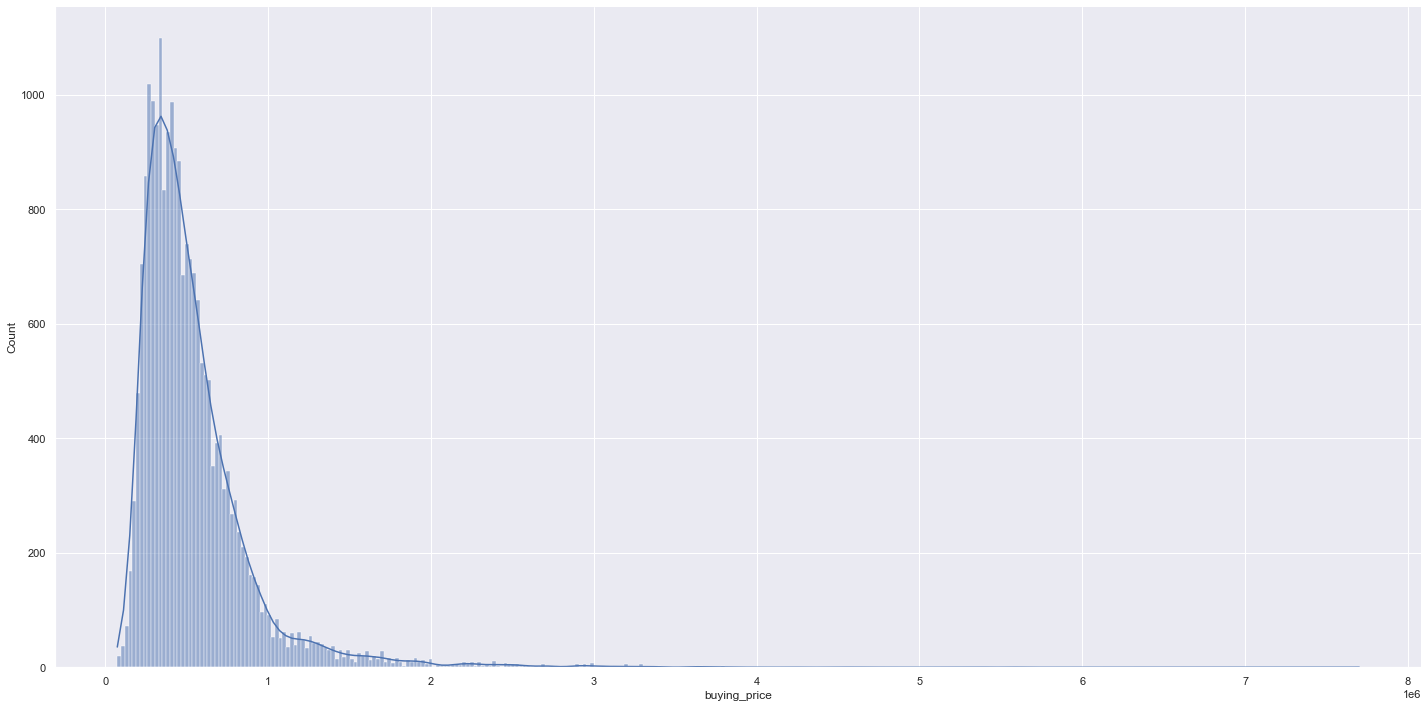

In [26]:
sns.displot( df4['buying_price'], kde=True, height=10, aspect=2 )
# aspect: Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

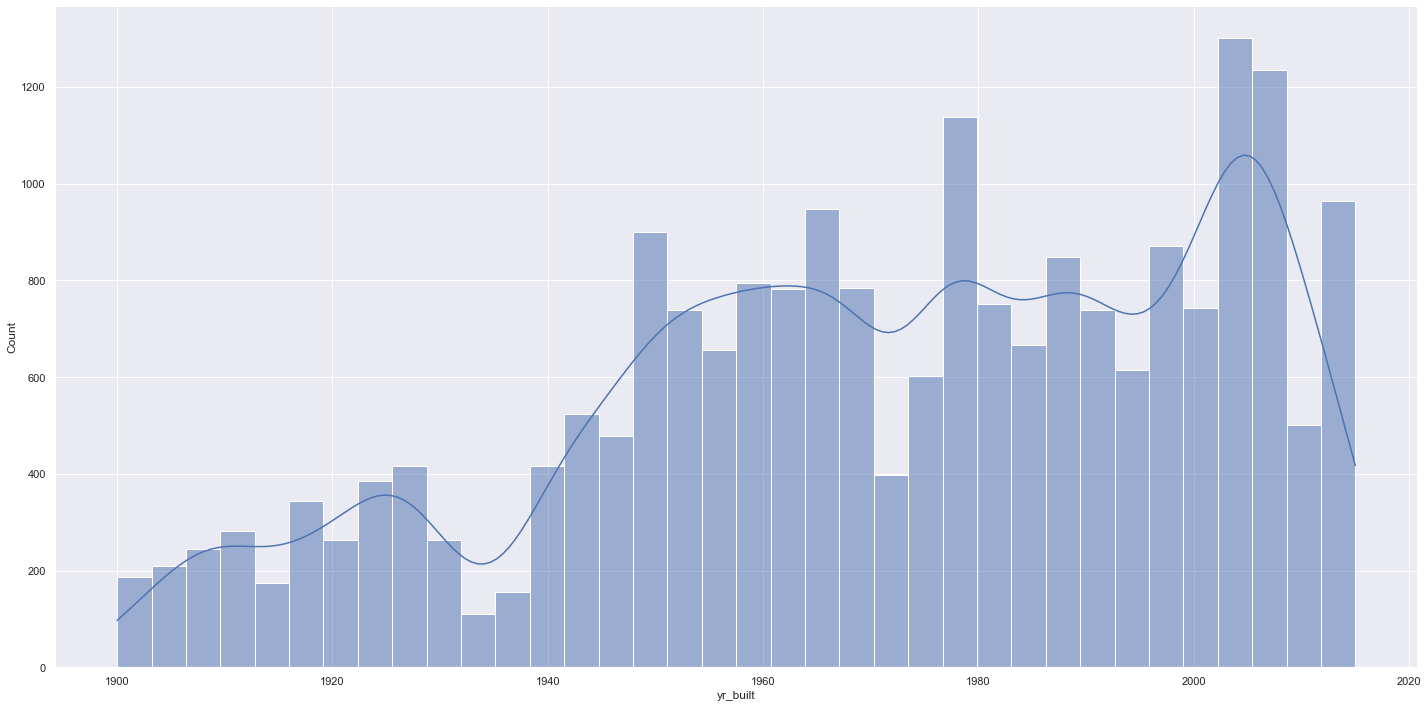

In [27]:
sns.displot( df4['yr_built'], kde=True, height=10, aspect=2 )

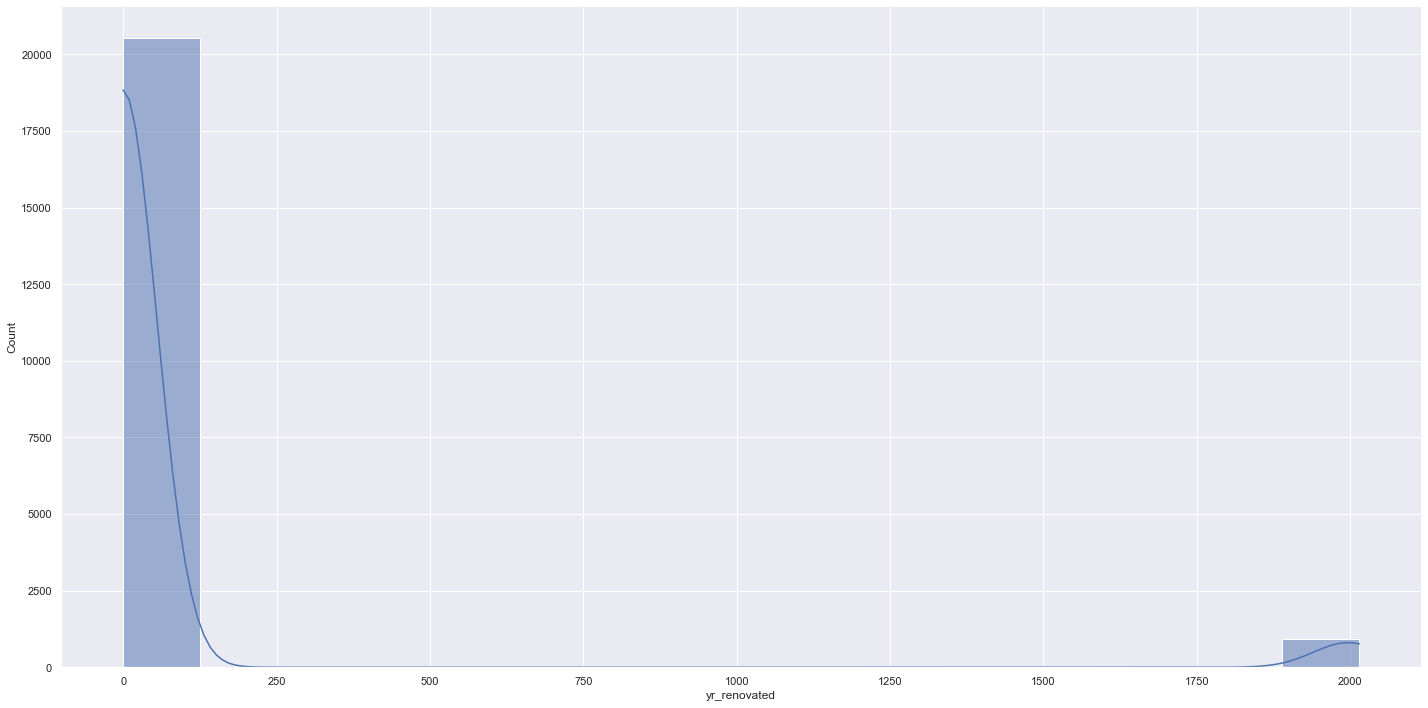

In [28]:
sns.displot( df4['yr_renovated'], kde=True, height=10, aspect=2 )

## Bivariate Analysis

### H1: Waterfront houses are 30% more expensive, on average. 
False: The average house price with a view of the water is about 211.76% higher.

In [38]:
# how many houses are waterfront?
print( 'There are {} waterfront houses in the dataset.'.format( df4.loc[df4['waterfront'] == 1].shape[0] ) )

There are 163 waterfront houses in the dataset.


In [39]:
# how many houses are NOT waterfront?
print( 'There are {} no waterfront houses in the dataset.'.format( df4.loc[df4['waterfront'] == 0].shape[0] ) )

There are 21272 no waterfront houses in the dataset.


In [40]:
# grouping by waterfront and checking price averages
aux = df4[['waterfront','buying_price']].groupby('waterfront').mean().reset_index()
aux

,waterfront,buying_price
0,0,533061.43
1,1,1661876.02


In [33]:
aux2 = (( abs( aux['buying_price'][0] - aux['buying_price'][1] )  ) / aux['buying_price'][0]) * 100 
print( 'The average house price with a view of the water is about {:.2f}% higher.'.format( aux2 ) )

The average house price with a view of the water is about 211.76% higher.


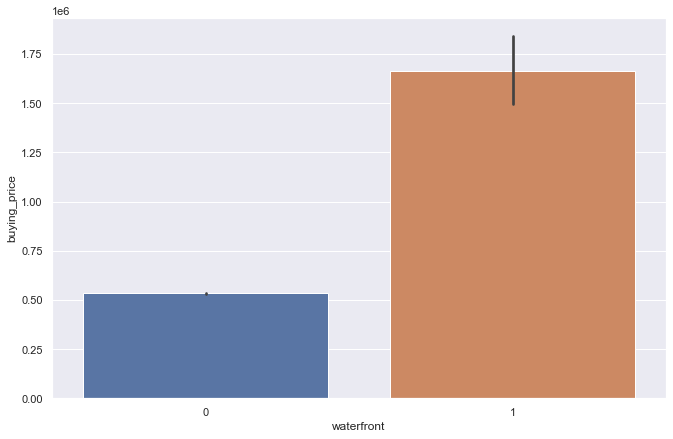

In [34]:
# plot
sns.barplot(df4['waterfront'], df4['buying_price']);

### H2: Houses constructed before 1955 are 50% cheaper, on average.

False: Houses constructed before 1955 are 1.40% cheaper, on average.

In [41]:
# grouping by construction (before and after 1955) and checking price averages
aux = df4[['construction','buying_price']].groupby( 'construction' ).mean().reset_index()
aux

,construction,buying_price
0,< 1955,536359.76
1,> 1955,543873.83


In [42]:
aux2 = (( abs( aux['buying_price'][0] - aux['buying_price'][1] )  ) / aux['buying_price'][0]) * 100 

print( 'Houses constructed before 1955 are {:.2f}% cheaper, on average.'.format( aux2 ) )

Houses constructed before 1955 are 1.40% cheaper, on average.


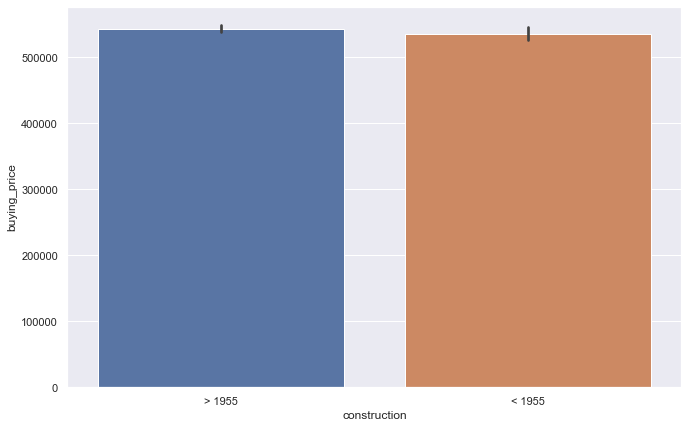

In [43]:
sns.barplot( df4['construction'], df4['buying_price'] );

### H3: Houses without basement have a total area (sqrt_lot) that is 40% larger than houses with basements.

False: Houses without basement have a total area (sqrt_lot) that is 18.55% larger than houses with basements.

In [44]:
# assuming that if the house has more than 0 of sqft_basement, it has a basement
without_basement = df4[df4['sqft_basement'] == 0]
with_basement = df4[df4['sqft_basement'] > 0]

aux = ( ( abs( without_basement['sqft_lot'].mean() - with_basement['sqft_lot'].mean() ) ) / without_basement['sqft_lot'].mean() )*100

print ( 'Houses without basement have a total area (sqrt_lot) that is {:.2f}% larger than houses with basements.'.format( aux ) )

Houses without basement have a total area (sqrt_lot) that is 18.55% larger than houses with basements.


### H4: YoY (Year over Year) house mean price growth is 10%.

False: YoY (Year over Year) house price growth is 0.18%.

In [53]:
# grouping by year and checking prices sum
aux = df4[['year','buying_price']].groupby( 'year' ).mean().reset_index()
aux

,year,buying_price
0,2014,541327.75
1,2015,542304.27


In [54]:
aux2 = ( ( abs( aux['buying_price'][0] - aux['buying_price'][1] ) ) / aux['buying_price'][0] ) * 100

print ( 'YoY (Year over Year) house price growth is {:.2f}%.'.format( aux2 ) )

YoY (Year over Year) house price growth is 0.18%.


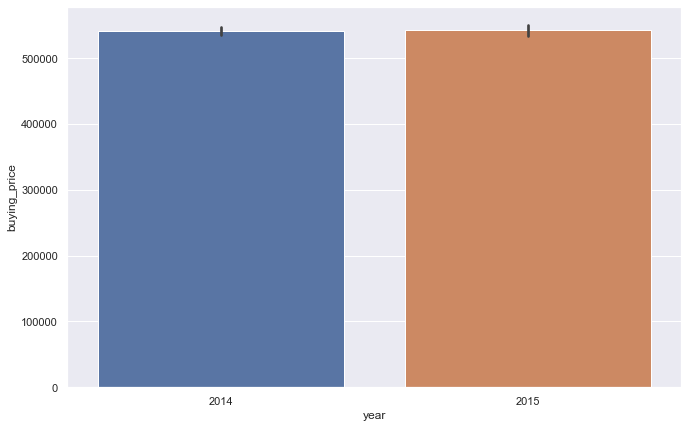

In [55]:
sns.barplot(df4['year'], df4['buying_price']);

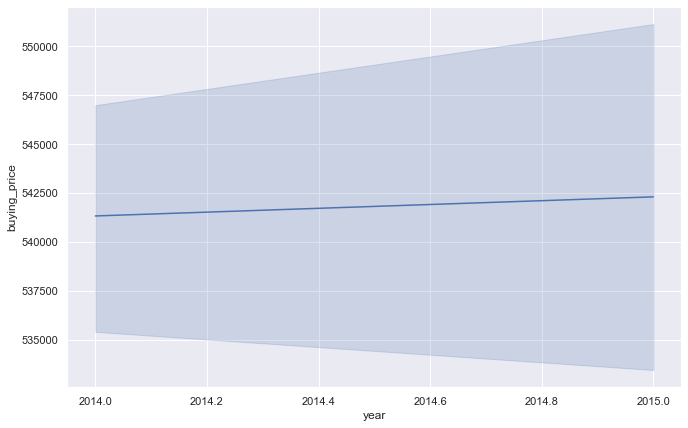

In [48]:
sns.lineplot(data = df4, x = 'year',  y = 'buying_price' );

### H5: Houses with 3 bathrooms have a MoM (Month over Month) growth of 15%.

False. Prices go up and down along the months.

<AxesSubplot:xlabel='month', ylabel='buying_price'>

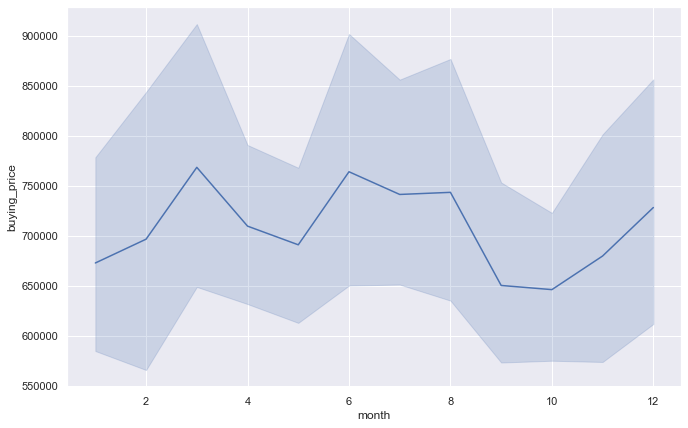

In [57]:
# separating houses with 3 bathrooms in a new dataset
with_3_baths = df4.loc[df4['bathrooms'] == 3,:]

# grouping by month and summing the prices
aux = with_3_baths[['month','buying_price']].groupby( 'month' ).sum().reset_index()

sns.lineplot(data = with_3_baths, x = 'month',  y = 'buying_price' )

### H6: Houses with conditions above index 3 (inclusive) are about 40% more expensive, on average, than houses with conditions 1 and 2.

True: Houses with conditions of index 3 are 38.48% more expensive than houses with conditions 1 and 2, on average.

In [60]:
# Strategy
# Group houses with conditions >= 3 and their prices in a new dataset
# Group houses with conditions 1 or 2 and their prices in a new dataset
# Compare the mean of these 2 datasets 

aux1 = df4.loc[df4['condition'] >= 3,['buying_price','condition']]
aux2 = df4.loc[df4['condition'] < 3,['buying_price','condition']]

result = ( aux1['buying_price'].mean() - aux2['buying_price'].mean() ) / aux1['buying_price'].mean() * 100

print( 'Houses with conditions of index 3 are {:.2f}% more expensive than houses with conditions 1 and 2, on average.'.format( result ) )

Houses with conditions of index 3 are 38.48% more expensive than houses with conditions 1 and 2, on average.


### H7: Houses with the highest level of construction and design quality (grade: 11-13) are 70% more expensive on average.

True: Houses with grade greater than 11 are 69.41% more expensive than others.

In [61]:
# checking all unique values for the variable 'grade'
df4['grade'].unique()

array([ 9,  8,  7,  6, 10, 12, 11,  5,  4, 13,  1,  3], dtype=int64)

In [63]:
# Strategy
# Group houses with grade 11-13 and their prices in a new dataset 
# Group houses with grade < 11 and their prices in a new dataset 
# Compare the mean of the prices of these 2 datasets

aux1 = df4.loc[df4['grade'] >= 11,['buying_price','grade']]
aux2 = df4.loc[df4['grade'] < 11,['buying_price','grade']]

result = ( aux1['buying_price'].mean() - aux2['buying_price'].mean() ) / aux1['buying_price'].mean() * 100
print( 'Houses with grade greater than 11 are {:.2f}% more expensive than others.'.format( result ) )

Houses with grade greater than 11 are 69.41% more expensive than others.


### H8: Unrenovated houses are more than 30% cheaper, on average, than houses that have been renovated at least once.

True: Unrenovated houses are 43.29% cheaper, on average, than houses that have been renovated at least once.

In [64]:
# checking possible values for the year of renovation
df4['yr_renovated'].unique()

array([   0, 1994, 1958, 1954, 2011, 2014, 1992, 1998, 2013, 2002, 2004,
       2005, 1986, 1990, 2001, 1984, 1956, 2010, 2000, 2003, 1977, 1996,
       2007, 1981, 1970, 1983, 1975, 1971, 1988, 1999, 2009, 1995, 1997,
       1969, 2015, 1982, 1989, 2006, 1993, 1985, 1953, 1955, 1979, 1987,
       1960, 1934, 1945, 2008, 1980, 2012, 1972, 1948, 1978, 1968, 1991,
       1974, 1965, 1946, 1940, 1963, 1976, 1964, 1973, 1967, 1944, 1959,
       1957, 1962, 1951, 1950], dtype=int64)

In [66]:
# Strategy
# Group houses that have been renovated in a new dataset
# Group houses that have not been renovated in a new dataset 
# Compare the mean of the prices of these 2 datasets

renovated_houses = df4[df4['yr_renovated'] != 0]
unrenovated_houses = df4[df4['yr_renovated'] == 0]

result = ( abs( unrenovated_houses['buying_price'].mean() - renovated_houses['buying_price'].mean() ) ) / unrenovated_houses['buying_price'].mean() * 100
print( 'Unrenovated houses are {:.2f}% cheaper, on average, than houses that have been renovated at least once.'.format( result ) )

Unrenovated houses are 43.29% cheaper, on average, than houses that have been renovated at least once.


### H9: More than 50% of water view houses have more than 1 floor.

True: 65.03% of water view houses have more then 1 floor.

In [67]:
# Strategy
# Separate houses with water view in a new dataset
# Compare the number of these houses that have 2 or more floors with houses with only 1 floor

wf_houses = df4[df4['waterfront'] == 1]

result = ( ( wf_houses[wf_houses['floors'] != 1].shape[0] ) / wf_houses.shape[0] ) * 100

print ( '{:.2f}% of water view houses have more then 1 floor.'.format( result ) )

65.03% of water view houses have more then 1 floor.


### H10: The larger the area of land, the higher the price of the house. 

False: There is not a clear or strong correlation between price and the area of the land.

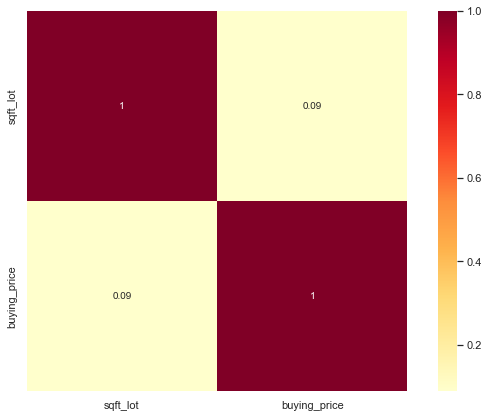

In [71]:
# checking the correlation between 'sqft_lot' and 'price' variable
sns.heatmap ( df4[['sqft_lot','buying_price']].corr( method="pearson" ), cmap='YlOrRd', annot=True, annot_kws= {'fontsize':'small'}, fmt='.01g', square=True );

Correlation between 'sqft_lot' and the 'price' is 0.09. This value is close to 0, meaning that there is a weak correlation between these 2 variables. 

# Business Questions

In [72]:
df5 = df4.copy()

## Which houses does House Rocket should buy and for what price?

In [73]:
df5['condition'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [96]:
# creating an auxiliary dataset containing prices grouped by zipcode
aux = df5[['zipcode','buying_price']].groupby( 'zipcode' ).median().reset_index()

# merging aux and df5 by the 'zipcode' column
# inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys
df5_1 = pd.merge(aux, df5, on='zipcode', how ='inner')

# renaming new generated columns
df5_1 = df5_1.rename( columns = { 'buying_price_y' : 'buying_price', 'buying_price_x' : 'buying_price_median' } ) 

# Let's suggest 'yes' for 'buy' houses that have prices below the median price of the region and have good condition (> 3), assuming that those are houses below market price
for i, row in df5_1.iterrows():
    if ( row['buying_price'] <= row['buying_price_median'] ) & ( row['condition'] > 3 ):
         df5_1.loc[i,'buy'] = 'yes'
    else:
         df5_1.loc[i,'buy'] = 'no'

df5_1.sample(10)

,zipcode,buying_price_median,id,date,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,year,month,condition_type,building_level,construction,season,buy
17922,98133,375000.00,9371700085,2014-07-22,425000.00,3,1.75,1380,8182,1.00,0,5,7,1380,0,1942,0,47.75,-122.35,2014,7,good,regular,< 1955,summer,no
17682,98126,396587.50,2695600130,2014-11-18,355000.00,2,1.00,1250,4558,1.00,0,3,7,1250,0,1948,0,47.53,-122.38,2014,11,regular,regular,< 1955,fall,no
8607,98053,635000.00,7202300540,2014-07-01,825000.00,4,2.75,3990,6637,2.00,0,3,9,3990,0,2003,0,47.68,-122.05,2014,7,regular,high-regular,> 1955,summer,no
6589,98038,342500.00,3744000100,2014-11-11,572115.00,4,3.25,3230,4838,2.00,0,3,9,3230,0,2014,0,47.36,-122.02,2014,11,regular,high-regular,> 1955,fall,no
9502,98056,380000.00,2296500036,2015-03-10,450000.00,4,2.75,2980,13260,1.00,0,4,8,1800,1180,1979,0,47.52,-122.20,2015,3,regular,high-regular,> 1955,spring,no
19480,98155,377225.00,6668900010,2014-11-17,254950.00,2,1.00,700,8100,1.00,0,3,6,700,0,1949,0,47.75,-122.31,2014,11,regular,low-regular,< 1955,fall,no
20468,98178,279500.00,4058800215,2014-05-28,430000.00,3,3.75,3890,7140,1.00,0,3,8,2390,1500,1943,2007,47.51,-122.24,2014,5,regular,high-regular,< 1955,spring,no
18883,98144,452500.00,5700000340,2015-04-27,700000.00,3,2.00,2130,4299,1.50,0,4,7,1680,450,1922,0,47.58,-122.29,2015,4,regular,regular,< 1955,spring,no
15686,98117,545000.00,2856100185,2014-07-21,365000.00,2,1.00,680,2550,1.00,0,4,5,680,0,1901,0,47.68,-122.39,2014,7,regular,low-regular,< 1955,summer,yes
5589,98033,678000.00,3982700125,2014-12-30,771000.00,4,2.50,2420,7200,2.00,0,3,9,2420,0,1991,0,47.69,-122.20,2014,12,regular,high-regular,> 1955,winter,no


In [80]:
# separating the data with 'buy' variable as 'yes'
buy = df5_1[df5_1['buy'] == 'yes']

# visualizing some of those selected houses in a table
buy[['id', 'buying_price', 'buy']].head()

,id,buying_price,buy
2,6143600580,184000.00,yes
3,7696630080,197000.00,yes
8,3356402020,230000.00,yes
13,3751605432,239950.00,yes
20,4012800050,175000.00,yes


In [81]:
# Which houses should House Rocket buy?
houses_to_buy = buy['id'].to_list()

In [82]:
print( 'A total of {} houses are suggested for House Rocket to buy.'.format( buy.shape[0] ) )

A total of 3844 houses are suggested for House Rocket to buy.


## Once bought, what is the best moment to sell the house and for what price?

Assumptions:

If the buying price is less than the median of the price by region and seasonality, selling price will be the buying price + 30%.

If the buying price is greater than the median of the price by region and seasonality, selling price will be the buying price + 10%.

In [97]:
# group houses by region (zipcode) and seasonality (season) and calculate median of the price within region and seasonality
df5_buy = df5_1[df5_1['buy'] == 'yes']
aux = df5_buy[['buying_price','zipcode','season']].groupby( ['zipcode','season'] ).median().reset_index()

# rename columns
aux = aux.rename( columns = {'buying_price' : 'buying_price_median_season', 'season': 'season_median'} ) 

# merge datasets
df5_2 = pd.merge( df5_buy, aux, on='zipcode', how = 'inner' )

# add selling price according to assumptions
for i, row in df5_2.iterrows():
    if ( row['buying_price'] < row['buying_price_median_season'] ):
         df5_2.loc[i, 'selling_price'] = row['buying_price'] * 1.3
    else:
         df5_2.loc[i, 'selling_price'] = row['buying_price'] * 1.1    
            
df5_2.sample(10)

,zipcode,buying_price_median,id,date,buying_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,year,month,condition_type,building_level,construction,season,buy,season_median,buying_price_median_season,selling_price
10002,98075,739999.50,224069105,2015-04-10,650100.00,2,1.00,1750,60872,1.00,0,4,7,1180,570,1973,0,47.59,-122.01,2015,4,regular,regular,> 1955,spring,yes,summer,610000.00,715110.00
7952,98056,380000.00,7227502155,2014-07-14,208000.00,2,1.00,820,5700,1.00,0,5,5,820,0,1942,0,47.49,-122.18,2014,7,good,low-regular,< 1955,summer,yes,fall,270000.00,270400.00
582,98002,235000.00,7889000125,2015-03-19,235000.00,3,1.00,1864,6978,1.00,0,4,7,1864,0,1958,0,47.28,-122.21,2015,3,regular,regular,> 1955,spring,yes,summer,209950.00,258500.00
1544,98006,760184.50,1777500060,2014-07-08,527700.00,5,2.50,2820,9375,1.00,0,4,8,1550,1270,1968,0,47.57,-122.13,2014,7,regular,high-regular,> 1955,summer,yes,fall,577500.00,686010.00
14887,98188,265000.00,5379801972,2014-08-18,265000.00,5,4.00,1400,8580,1.00,0,5,7,900,500,1954,0,47.46,-122.29,2014,8,good,regular,< 1955,summer,yes,fall,245000.00,291500.00
9929,98075,739999.50,424069096,2014-07-31,460000.00,3,1.75,1400,12155,1.00,0,4,7,1400,0,1977,0,47.59,-122.05,2014,7,regular,regular,> 1955,summer,yes,spring,650000.00,598000.00
4256,98029,574500.00,3904910480,2014-07-31,490000.00,3,2.50,2010,9725,2.00,0,4,8,2010,0,1987,0,47.57,-122.02,2014,7,regular,high-regular,> 1955,summer,yes,summer,500000.00,637000.00
5186,98033,678000.00,1233100260,2014-11-14,490000.00,3,1.00,1260,9638,2.00,0,4,7,1260,0,1920,0,47.68,-122.18,2014,11,regular,regular,< 1955,fall,yes,summer,567500.00,637000.00
8960,98059,435000.00,6649500040,2014-08-12,255000.00,3,1.00,1250,9472,1.00,0,4,6,1250,0,1972,0,47.49,-122.15,2014,8,regular,low-regular,> 1955,summer,yes,fall,334950.00,331500.00
1924,98006,760184.50,2204500480,2015-01-07,551100.00,3,1.00,1430,8640,1.00,0,5,7,1430,0,1954,0,47.57,-122.15,2015,1,good,regular,< 1955,winter,yes,fall,577500.00,716430.00
